# TensorFlores - Example 01

## 1. Importing libraries

In [1]:
import sys, os
path = os.getcwd().split('\\examples')[0]
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflores.models.multilayer_perceptron import MultilayerPerceptron

## 2. Load Dataset

In [3]:
df = pd.read_csv(path + '\\data\\emission_total.csv')
df.head(5)

,CO2 (g/s) [estimated maf],CO2 (g/s) [maf],estimated_maf,intake_pressure,intake_temperature,latitude,longitude,maf,rpm,speed
0,0.809921,0.639659,3.798529,26.0,54.0,-5.793477,-35.198093,3.0,1568.0,43.0
1,1.796942,2.132196,8.427658,57.0,53.0,-5.793538,-35.198116,10.0,1582.0,43.0
2,2.199995,2.132196,10.317979,69.0,53.0,-5.793600,-35.198139,10.0,1600.0,43.0
3,1.226761,0.639659,5.753511,38.0,54.0,-5.793665,-35.198170,3.0,1625.0,44.0
4,0.756202,0.426439,3.546585,24.0,54.0,-5.793739,-35.198196,2.0,1586.0,45.0


In [4]:
scaler = MinMaxScaler()

In [5]:
values_df = scaler.fit_transform(df[['intake_pressure', 'intake_temperature', 'speed', 'CO2 (g/s) [maf]']])

In [6]:
X = values_df[:,0:3]
y = values_df[:,3:]

## 3. Splitting the data

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## 4. Define the model

### 4.1 Define hidden layers and neurons

In [9]:
hidden_layer_sizes = [16, 8]             

### 4.2 Define activaction functions

In [10]:
activation_functions = ['relu', # Hidden layer (16 neurons)
                        'relu', # Hidden layer (8 neurons)
                       'linear'] # Output layer (8 neurons)

### 4.3 Define input and output size

In [11]:
input_size = X.shape[1]
output_size = y.shape[1]

### 4.4 Disable quantization-aware training

In [12]:
training_with_quantization = False

### 4.5 Define the type of weight and bias initialisation

In [13]:
weight_bias_init = 'RandomNormal'

### 4.6 Create the TensorFlores class

In [14]:
nn = MultilayerPerceptron()

In [15]:
nn = MultilayerPerceptron(input_size = input_size,
                            hidden_layer_sizes = hidden_layer_sizes,
                            output_size = output_size ,
                            activation_functions = activation_functions,
                            weight_bias_init = weight_bias_init,
                            training_with_quantization = training_with_quantization)


### 4.7 Define training epochs

In [16]:
epochs =  100

### 4.8 Define the batch size

In [17]:
batch_size = 36

### 4.9 Define the loss function

- 'mean_squared_error'
- 'cross_entropy'
- 'mean_absolute_error'
- 'binary_cross_entropy'

In [18]:
loss_function = 'mean_squared_error'

### 4.10 Define the optimizer

- 'sgd'
- 'adam'
- 'adamax'

In [19]:
optimizer = 'adamax'

In [20]:
nn.train(X = X_train, 
         y = y_train,
         epochs = epochs, 
         learning_rate = 0.0001,
         loss_function=loss_function, 
         optimizer=optimizer, 
         batch_size=batch_size, 
         validation_split = 0.2)

Epoch 1/100, Loss: 41.858449281568575, Val Loss: 46.26630215282912
Epoch 2/100, Loss: 50.11502541775152, Val Loss: 44.81620227249461
Epoch 3/100, Loss: 34.76294726283555, Val Loss: 43.38823558303176
Epoch 4/100, Loss: 46.803143506611754, Val Loss: 41.98371149418847
Epoch 5/100, Loss: 40.21847594907818, Val Loss: 40.60170224040532
Epoch 6/100, Loss: 43.55153059460534, Val Loss: 39.24203874588786
Epoch 7/100, Loss: 39.5072145065147, Val Loss: 37.905371341997544
Epoch 8/100, Loss: 35.013963659647615, Val Loss: 36.59169475750194
Epoch 9/100, Loss: 36.465047331175306, Val Loss: 35.301308214026726
Epoch 10/100, Loss: 26.839675798321565, Val Loss: 34.03447260268825
Epoch 11/100, Loss: 27.42214895961269, Val Loss: 32.791685214598715
Epoch 12/100, Loss: 32.60834164444047, Val Loss: 31.57323388306496
Epoch 13/100, Loss: 40.67764842152974, Val Loss: 30.381542862090303
Epoch 14/100, Loss: 33.97043113264254, Val Loss: 29.21939578895789
Epoch 15/100, Loss: 23.554009822444648, Val Loss: 28.0817593099

In [21]:
error = nn.predict(X_test) - y_test

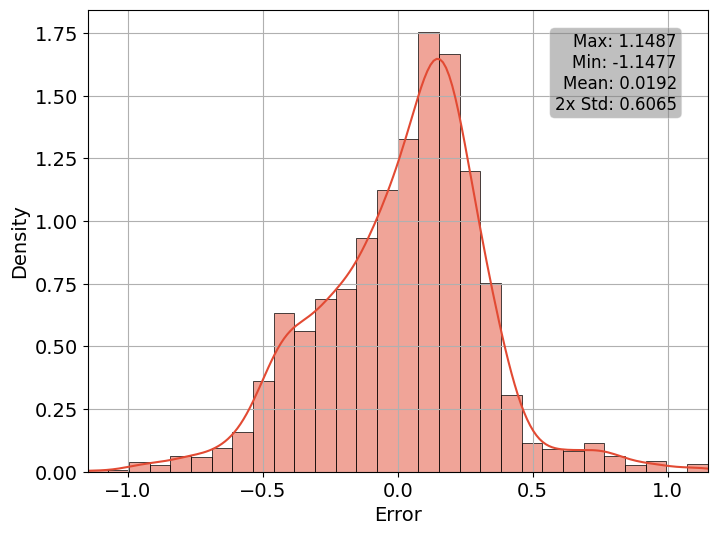

In [22]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_01.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()

### 4.11 Save model as C++

In [23]:
nn.save_model_as_cpp('./tensorflores_without_quant')

Model C++ saved!


### 4.12 Save model as json

In [24]:
nn.save_model_as_json('./tensorflores_without_quant')

Model saved successfully as './tensorflores_without_quant.json'!


### 4.12 Load model from json

In [25]:
json_data = nn.load_json_model('./tensorflores_without_quant')
json_data

Successfully loaded JSON file: ./tensorflores_without_quant.json


{'model_quantized': False,
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[-0.0005772341026594916,
     -0.5119157914591745,
     -1.3189779787766966,
     -1.9037018013659437,
     1.1653238877453183,
     0.6979194232837418,
     -0.4947619250545843,
     0.5596694645277294,
     0.017927842179126293,
     0.4258959180168385,
     -0.7844215229879007,
     -0.6032661853253871,
     1.0562813891255107,
     -0.9984179598545366,
     -0.4751303435229142,
     0.30954778709071823],
    [-1.8279283822629908,
     -0.8736809736211831,
     0.26488414978405633,
     -0.18527473295441668,
     -0.28297667843023394,
     0.30667821875944506,
     1.7694933626794898,
     1.917080727870769,
     0.04506059801060034,
     -0.5984374585251195,
     0.9413366064050688,
     -1.5926025821478966,
     0.9144431819871668,
     0.49239482384405703,
     -0.893092057504579,
     -0.012206797064560581],
    [0.7425815991919884,
     -1.6716265349098656,
     1.149758634153701,
   